In [1]:
from datetime import datetime
import datetime
import time

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import rsa


**var**

In [2]:
enc_rsa = []
x_rsa = []
dec_rsa = []

enc_elg = []
x_elg = []
dec_elg = []

_msg_ElGamal = []
_msg_RSA = []

RSA - function

In [3]:
def RSA(msg):
 
    # generate public and private keys with
    # rsa.newkeys method,this method accepts
    # key length as its parameter
    # key length should be atleast 16
    publicKey, privateKey = rsa.newkeys(2048)
    
    # this is the string that we will be encrypting
    message = msg

    x_rsa.append(int(len(msg)))
    
    # rsa.encrypt method is used to encrypt
    # string with public key string should be
    # encode to byte string before encryption
    # with encode method

    now1 = datetime.datetime.now() # time object

    encMessage = rsa.encrypt(message.encode(),
                            publicKey)

    now2 = datetime.datetime.now()
    enc_time = now2-now1
    enc_rsa.append(int(enc_time.microseconds))
    
    # print("original string: ", message)
    # print("encrypted string: ", encMessage)
    
    # the encrypted message can be decrypted
    # with ras.decrypt method and private key
    # decrypt method returns encoded byte string,
    # use decode method to convert it to string
    # public key cannot be used for decryption
    decMessage = rsa.decrypt(encMessage, privateKey).decode()

    now3 = datetime.datetime.now() # time object
    dec_time = now3-now2 
    dec_rsa.append(int(dec_time.microseconds))
    
    # print("decrypted string: ", decMessage)

ElGamal - function

In [4]:
# Python program to illustrate ElGamal encryption

import random
from math import pow

a = random.randint(2, 10)

def gcd(a, b):
	if a < b:
		return gcd(b, a)
	elif a % b == 0:
		return b
	else:
		return gcd(b, a % b)

# Generating large random numbers
def gen_key(q):

	key = random.randint(pow(10, 20), q)
	while gcd(q, key) != 1:
		key = random.randint(pow(10, 20), q)

	return key

# Modular exponentiation
def power(a, b, c):
	x = 1
	y = a

	while b > 0:
		if b % 2 != 0:
			x = (x * y) % c
		y = (y * y) % c
		b = int(b / 2)

	return x % c

# Asymmetric encryption
def encrypt(msg, q, h, g):

	en_msg = []

	k = gen_key(q)# Private key for sender
	s = power(h, k, q)
	p = power(g, k, q)
	
	for i in range(0, len(msg)):
		en_msg.append(msg[i])

	# print("g^k used : ", p)
	# print("g^ak used : ", s)
	for i in range(0, len(en_msg)):
		en_msg[i] = s * ord(en_msg[i])

	return en_msg, p

def decrypt(en_msg, p, key, q):

	dr_msg = []
	h = power(p, key, q)
	for i in range(0, len(en_msg)):
		dr_msg.append(chr(int(en_msg[i]/h)))
		
	return dr_msg

# Driver code

def ElGamal(msg):
	
	# print("Original Message :", msg)
	x_elg.append(len(msg))
	q = random.randint(pow(10, 20), pow(10, 50))
	g = random.randint(2, q)

	key = gen_key(q)# Private key for receiver
	h = power(g, key, q)
	# print("g used : ", g)
	# print("g^a used : ", h)

	#encryption
	now1 = datetime.datetime.now()
	# time.sleep(0.2)
	en_msg, p = encrypt(msg, q, h, g)
	now2 = datetime.datetime.now()
	enc_time = now2-now1
	# print("-->enc_time : ", enc_time)
	enc_elg.append(int(enc_time.microseconds))					#<--

	#decryption
	# time.sleep(0.2)
	dr_msg = decrypt(en_msg, p, key, q)
	dmsg = ''.join(dr_msg)
	# print("Decrypted Message :", dmsg)
	now3 = datetime.datetime.now()
	dec_time = now3-now2
	# print("-->dec_time : ", dec_time)
	dec_elg.append(int(dec_time.microseconds))					#<--

	# print()


RSA

In [5]:
_msg_RSA = []
i = 1
s = str(i)
while(i < 200):
    s += str(i)
    _msg_RSA.append(s)
    i += 1

for i in _msg_RSA:
    RSA(i)

OverflowError: 247 bytes needed for message, but there is only space for 245

ElGamal

In [28]:
_msg_ElGamal = []
i=1
s = str(i)
while(i < 1024*16):
    s += str(i)
    _msg_ElGamal.append(s)
    i += 1

for i in _msg_ElGamal:
    ElGamal(i)

RSA-Plot

In [34]:
enc_rsa = enc_rsa[:115]
dec_rsa = dec_rsa[:115]
x_rsa = x_rsa[:115]

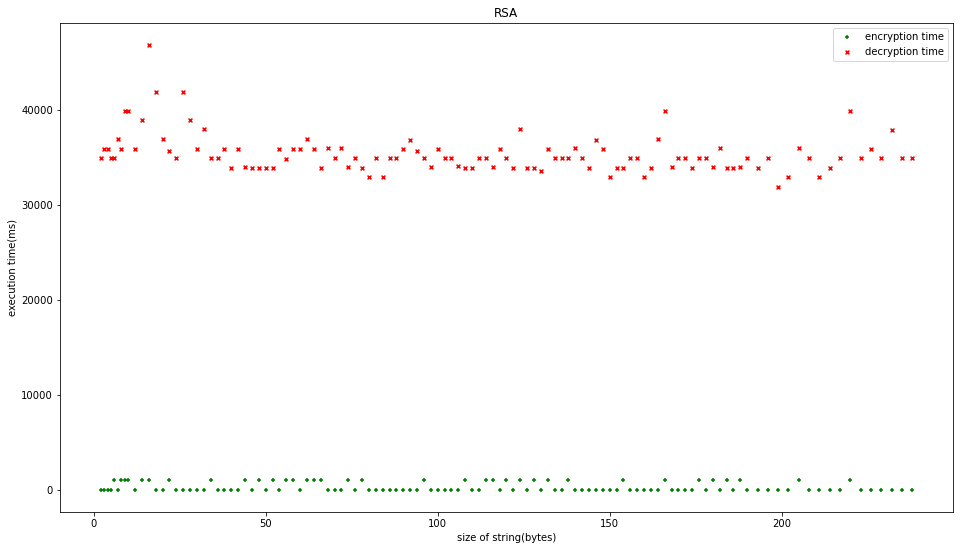

In [39]:
import matplotlib.pyplot as plt
  
imagesize=(16,9)

fig, ex = plt.subplots(figsize = imagesize)
ex.scatter(x_rsa, enc_rsa, label='encryption time', marker='+', c="green", s=15)
ex.scatter(x_rsa, dec_rsa, label='decryption time', marker='x', c="red", s=15)

# x-axis label
plt.xlabel('size of string(bytes)')
# frequency label
plt.ylabel('execution time(ms)')
# plot title
plt.title('RSA')
# showing legend
plt.legend()
  
# function to show the plot
plt.show()

ElGamal-Plot

In [40]:
for index, item in enumerate(enc_elg):
    if item > 70000:
        enc_elg[index] = -1
for index, item in enumerate(dec_elg):
    if item > 70000:
        dec_elg[index] = -1

In [41]:
enc_elg = enc_elg[:18200]
dec_elg = dec_elg[:18200]
x_elg = x_elg[:18200]

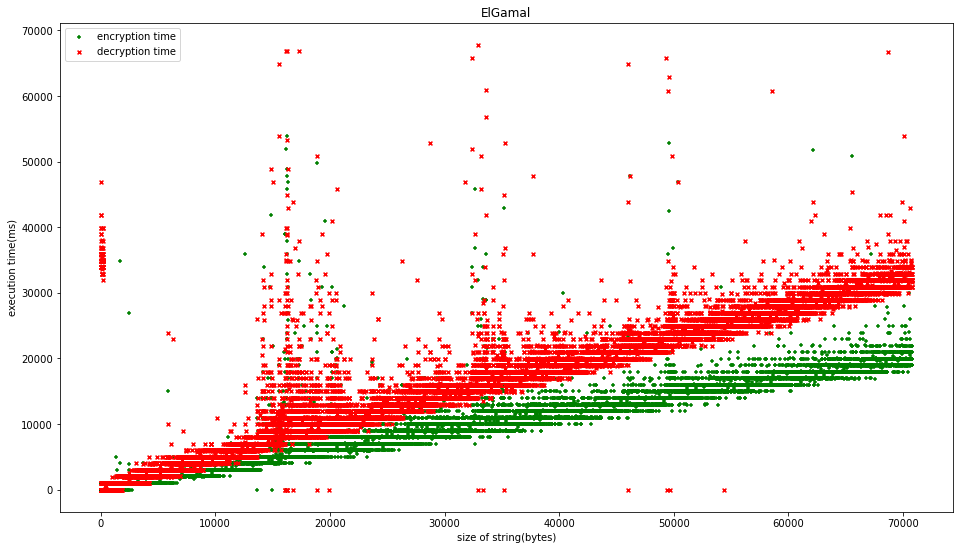

In [42]:
imagesize=(16,9)

fig, ex = plt.subplots(figsize = imagesize)
ex.scatter(x_elg, enc_elg, label='encryption time', marker='+', c="green", s=15)
ex.scatter(x_elg, dec_elg, label='decryption time', marker='x', c="red", s=15)

# x-axis label
plt.xlabel('size of string(bytes)')
# frequency label
plt.ylabel('execution time(ms)')
# plot title
plt.title('ElGamal')
# showing legend
plt.legend()
  
# function to show the plot
plt.show()